# Data Analyze & Visualization

Python is exceptionally good at analyzing and visualizing data, because of it's libraries like NumPy, Pandas, and Matplotlib.

These libraries provides robust tools for handling large datasets, performing complex calculations and creating informative visualizations.

Installing the libraries:
```bash
pip install numpy pandas matplotlib
```

<br>

---

<br>

#### Pandas
It's a powerful data manipulation library that provides data structures like DataFrame (for two-dimensional, tabular data) to store and manipulate data in a tabular form. 

It offers a wide range of functions for data cleaning, manipulation, and analysis.

In [1]:
import pandas as pd

data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240415.csv")

# Displaying the first rows of the DataFrame
data.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


In [3]:
# First element of tuple returned by data.shape = number of rows in the DataFrame
total_number_of_crimes = data.shape[0];
print(f'Total amount of crimes in the dataset: {total_number_of_crimes}')


# Extracts the column category with only unique values
crime_categories = data['Category'].unique()
num_crime_categories = len(crime_categories)
print(f'Total amount of crime categories: {num_crime_categories}')


# Count the number of crimes in each category
crime_counts = data['Category'].value_counts()
print(f'Number of crimes in each category: {crime_counts}')

Total amount of crimes in the dataset: 2129525
Total amount of crime categories: 37
Number of crimes in each category: Category
LARCENY/THEFT                  477975
OTHER OFFENSES                 301874
NON-CRIMINAL                   236928
ASSAULT                        167042
VEHICLE THEFT                  126228
DRUG/NARCOTIC                  117821
VANDALISM                      114718
WARRANTS                        99821
BURGLARY                        91067
SUSPICIOUS OCC                  79087
ROBBERY                         54467
MISSING PERSON                  44268
FRAUD                           41348
FORGERY/COUNTERFEITING          22995
SECONDARY CODES                 22378
WEAPON LAWS                     21004
TRESPASS                        19194
PROSTITUTION                    16501
STOLEN PROPERTY                 11450
DISORDERLY CONDUCT               9932
DRUNKENNESS                      9760
SEX OFFENSES, FORCIBLE           8747
RECOVERED VEHICLE                868

<br>

---

<br>

#### NumPy
Fundamental package for scientific computing in Python.

Supporting arrays, matrices and many mathematical functions to operate on these data structures efficiently.
- calculating mean/average, standard deviation, arithmetic, trigonometry, logarithms, exponentials and more.


In [5]:
import numpy as np

# Convert the crime counts to a NumPy array
crime_counts_array = crime_counts.values

# Median and Standard Deviation of Crimes
mean_crimes = np.mean(crime_counts_array).round(2)
std_dev_crimes = np.std(crime_counts_array).round(2)

print(f"Mean number of crimes across categories: {mean_crimes}")
print(f"Standard deviation of crimes across categories: {std_dev_crimes}")

Mean number of crimes across categories: 57554.73
Standard deviation of crimes across categories: 98346.55


<br>

---

<br>

#### Matplotlib
Library for creating static, animated and interactive visualizations in Python.

Provides an extensive range of plotting functions to create high-quality graphs and charts, including line plots, bar charts, histograms, scatter plots, and more.

Matplotlib is highly customizable, enabling users to adjust every aspect of their plots to improve clarity and presentation.

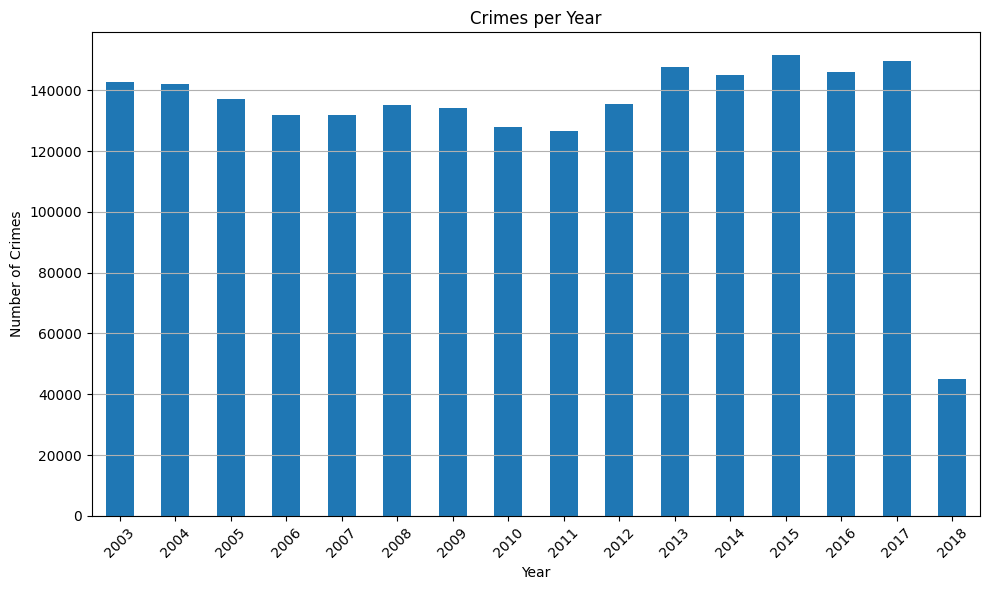

In [18]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Group the data by year and count the number of crimes in each year
crime_counts_per_year = data.groupby('Year').size()

# Create a bar plot
plt.figure(figsize=(10, 6))
crime_counts_per_year.plot(kind='bar')
plt.title('Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

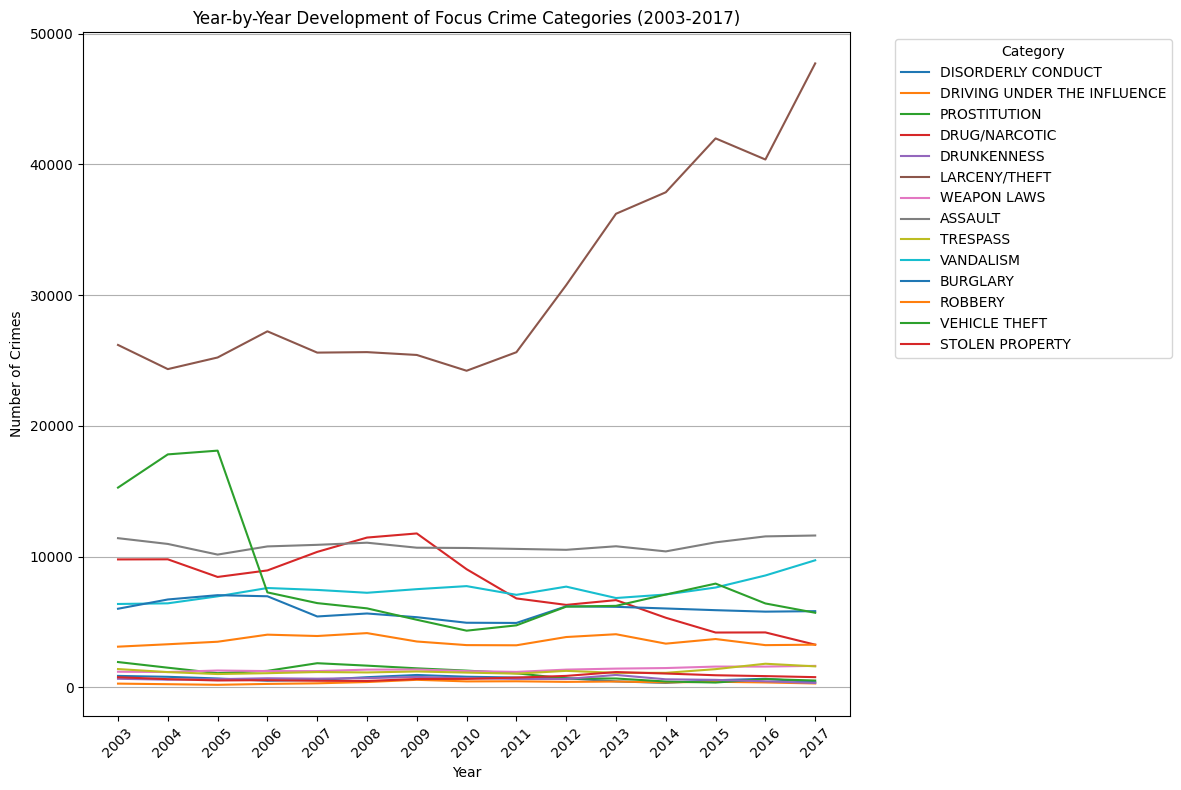

In [19]:
# List of focus crime categories
focuscrimes = set([
    'WEAPON LAWS', 
    'PROSTITUTION', 
    'DRIVING UNDER THE INFLUENCE', 
    'ROBBERY', 
    'BURGLARY', 
    'ASSAULT', 
    'DRUNKENNESS', 
    'DRUG/NARCOTIC', 
    'TRESPASS', 
    'LARCENY/THEFT', 
    'VANDALISM', 
    'VEHICLE THEFT', 
    'STOLEN PROPERTY', 
    'DISORDERLY CONDUCT'
])


# Filter the data for focus crimes and years 2003-2017
focus_crimes_data = data[(data['Category'].isin(focuscrimes)) & (data['Year'] >= 2003) & (data['Year'] <= 2017)]

# Group the filtered data by year and category, and count the number of crimes in each year-category combination
crime_counts_per_year_category = focus_crimes_data.groupby(['Year', 'Category']).size().unstack()

# Create a bar plot for each focus crime category
plt.figure(figsize=(12, 8))
for category in focuscrimes:
    crime_counts_per_year_category[category].plot(kind='line', label=category)

plt.title('Year-by-Year Development of Focus Crime Categories (2003-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(2003, 2018), rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()